## Results (WaSR+YOLO)

In [1]:
from PIL import Image, ImageDraw
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def get_box_coord(raw_size, box_path):
    
    labels = []
    f = open(box_path, 'r')
    lines = f.readlines()
    for line in lines:
        line = line.replace('\n','') if '\n' in line else line
        temp = [float(x) for x in line.split(' ')[1:]]
        labels += [temp]
    f.close()
    
    corners = []
    for label in labels:
    
        label[0] *= raw_size[0]
        label[1] *= raw_size[1]
        label[2] *= raw_size[0]
        label[3] *= raw_size[1]
        
        x1 = label[0] - label[2]/2
        x2 = label[0] + label[2]/2
        y1 = label[1] - label[3]/2
        y2 = label[1] + label[3]/2
        
        corners += [[int(round(x,0)) for x in [x1, y1, x2, y2]]]

    return corners

In [3]:
img_num = '0765'
raw_path = f'./datasets/MaSTr1325/images/{img_num}.jpg'
seg_path = f'./WaSR/output/predictions/my_wasr_no_imu_random2/{img_num}m.png'
box_path = f'./yolov5/runs/detect/exp13/labels/{img_num}.txt'


##### visualization::binary

(512, 384)
(512, 384)


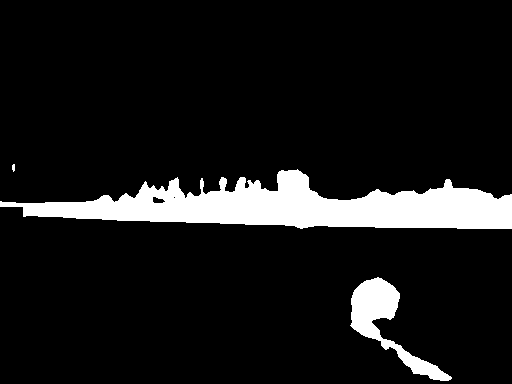

In [4]:
raw_img = Image.open(raw_path)
print(raw_img.size)

## raw image에 bounding box 그리기
coords = get_box_coord(raw_img.size, box_path)
draw = ImageDraw.Draw(raw_img)
for coord in coords:
    draw.rectangle((coord[0],coord[1],coord[2],coord[3]), outline=(0,255,0), width = 3)
# display(raw_img)

## segmentation 결과
seg_img = Image.open(seg_path)
print(seg_img.size)
# display(seg_image)


## segmentation에서 obstacle만 추출
# seg_img = seg_img.resize((1920, 1080))
seg_arr = np.array(seg_img)
bin_img = np.where(seg_arr[:,:,0]==247,1,0)

## bounding box 부분 제외시키기
for coord in coords:
    bin_img[coord[1]:coord[3], coord[0]:coord[2]] = 0

sub_img=Image.fromarray(np.uint8(bin_img * 255), 'L')
display(sub_img)

## 이미지 저장
# sub_img.save(f'./results/{img_num}_sub.png', 'png')

##### visualization2::contour

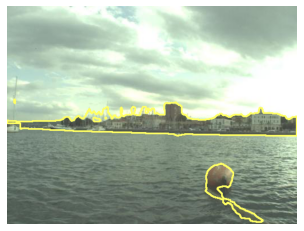

In [5]:
image = cv2.cvtColor(np.array(sub_img), cv2.COLOR_RGB2BGR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)

cont_img = Image.open(raw_path)
cont_img = cv2.cvtColor(np.array(cont_img), cv2.COLOR_RGB2BGR)

contours,_ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont_img = cv2.drawContours(cont_img, contours, -1, (100, 255, 255), 2)

plt.imshow(cv2.cvtColor(cont_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
# plt.savefig(f'./results/{img_num}_cont.png', bbox_inches='tight',pad_inches = 0, dpi=300)
plt.show()